# Part 1 Descriptive Statistics
## 1.1 Measures of Central Tendency
1. Mean: the average of all values in a dataset, calculated by summing all values and dividing by the count.
2. Median: The middle value when data is arranged in order, less sensitive to outliers than the mean.
3. Mode: the most frequently occurring value(s) in a dataset.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = random.sample(range(1, 50), 15) # 15 random integers between 1 and 50

mean_value = np.mean(data)
median_value = np.median(data)
mode_value = stats.mode(data, keepdims=True)[0][0]

print(f"Data: {data}")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

In [ ]:
#Visualization:
plt.figure(figsize=(10,6))
sns.histplot(data, bins=8, kde=True)

plt.axvline(mean_value, color='red', linestyle="--", linewidth=2, label=f'Mean: {mean_value:.1f}')
plt.axvline(median_value, color='green', linestyle="-.", linewidth=2, label=f'Median: {median_value:.1f}')
plt.axvline(mode_value, color='blue', linestyle=':', linewidth=2, label=f'Mode: {mode_value}')

plt.title('Distribution with Measures of Central Tendency')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

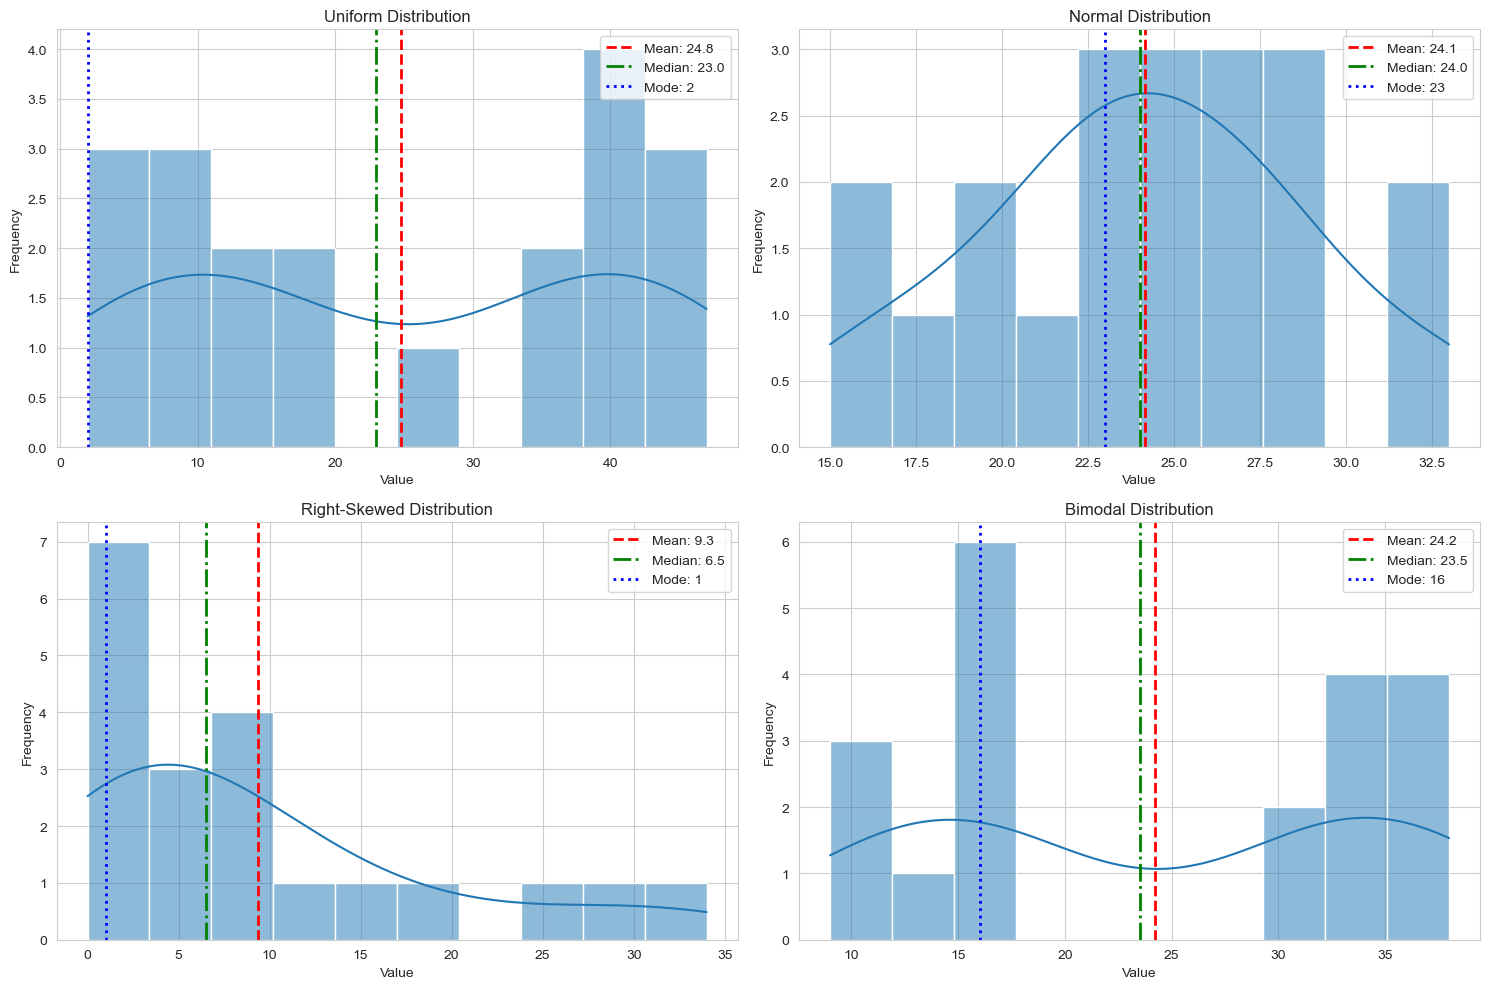

Central Tendency Comparison Across Distributions:
--------------------------------------------------
Distribution    Mean       Median     Mode      
--------------------------------------------------
Uniform         24.75      23.00      2         
Normal          24.15      24.00      23        
Right-Skewed    9.35       6.50       1         
Bimodal         24.20      23.50      16        


In [6]:
np.random.seed(42)
random.seed(42)

# 1. uniform distribution no clear central tendency
uniform_data = random.sample(range(1,50), 20)

# 2. Normal/Gaussian Distribution (bell curve)
normal_data = np.random.normal(loc=25, scale=5, size=20).round().astype(int)

# 3. Skewed distribution (values cluster on one side)
skewed_data = np.random.exponential(scale=10, size=20).round().astype(int)

# 4. Bimodal Distribution (two peaks)
bimodal_data = np.concatenate([
    np.random.normal(loc=15, scale=3, size=10),
    np.random.normal(loc=35, scale=3, size=10)
]).round().astype(int)

def analyze_central_tendency(data, title, position):
    mean_value = np.mean(data)
    median_value = np.median(data)
    mode_value = stats.mode(data, keepdims=True)[0][0]

    # Create subplot
    plt.subplot(2, 2, position)
    sns.histplot(data, bins=10, kde=True)

    # Add vertical lines
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.1f}')
    plt.axvline(median_value, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_value:.1f}')
    plt.axvline(mode_value, color='blue', linestyle=':', linewidth=2, label=f'Mode: {mode_value}')

    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()

    return mean_value, median_value, mode_value

# Plot all distributions
plt.figure(figsize=(15, 10))

# Analyze each distribution
uniform_stats = analyze_central_tendency(uniform_data, 'Uniform Distribution', 1)
normal_stats = analyze_central_tendency(normal_data, 'Normal Distribution', 2)
skewed_stats = analyze_central_tendency(skewed_data, 'Right-Skewed Distribution', 3)
bimodal_stats = analyze_central_tendency(bimodal_data, 'Bimodal Distribution', 4)

plt.tight_layout()
plt.show()

# Print statistics for comparison
distributions = ['Uniform', 'Normal', 'Right-Skewed', 'Bimodal']
all_stats = [uniform_stats, normal_stats, skewed_stats, bimodal_stats]

print("Central Tendency Comparison Across Distributions:")
print("-" * 50)
print(f"{'Distribution':<15} {'Mean':<10} {'Median':<10} {'Mode':<10}")
print("-" * 50)

for dist, stats in zip(distributions, all_stats):
    print(f"{dist:<15} {stats[0]:<10.2f} {stats[1]:<10.2f} {stats[2]:<10.0f}")

## 1.2 Measures of Dispersion
- Range: The difference between the maximum and minimum values.
- Variance: Measures how spread out the data is from the mean (averaged squared deviation)
- Standard Deviation: Square root of variance; indicates how much values typically differ from the mean.
- Interquartile Range (IQR): The range of the middle 50% of values (Q3-Q1)

In [7]:
data = random.sample(range(1,50), 20)

#calculate measures of dispersion
range_value = max(data) - min(data)

variance = np.var(data)

std_dev = np.std(data)

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1

print(f"Range: {range_value}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"Interquartile Range: {iqr}")

Range: 45
Variance: 201.98999999999995
Standard Deviation: 14.212318600425476
Q1 (25th percentile): 12.5
Q3 (75th percentile): 37.25
Interquartile Range: 24.75


## 1.3 Data Visualization
- Histogram: Shows the distribution of a dataset by splitting it into bins.
- Box Plot: Displays the five-number summary (min, Q1, median, Q3, max) and potential outliers.
- Violin Plot: Combines box plot with kernel density estimation to show distribution shape.
- Scatter Plot: Shows relationships between 2 variables.

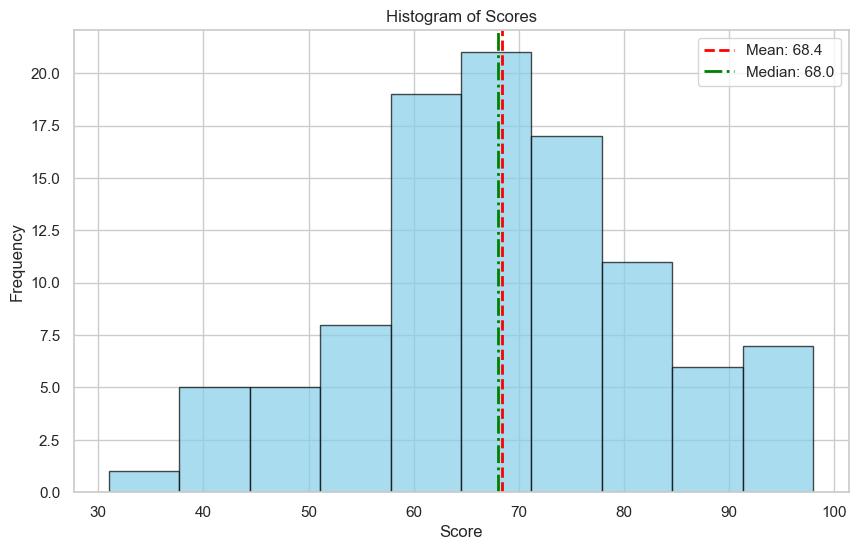

In [8]:
sns.set(style="whitegrid")

np.random.seed(42)
scores = np.random.normal(70, 15, 100).round()

plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(scores), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(scores):.1f}')
plt.axvline(np.median(scores), color='green', linestyle='-.', linewidth=2, label=f'Median: {np.median(scores):.1f}')
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Text(0.6, 31.0, 'Minimum: 31.0')

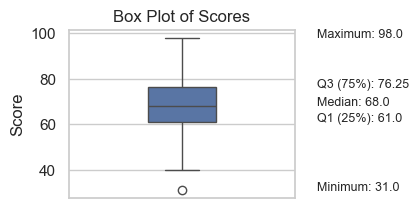

In [9]:
# box plot:
plt.subplot(2,2,1)
sns.boxplot(y=scores, width=0.3)
plt.title('Box Plot of Scores')
plt.ylabel('Score')
plt.text(0.6, np.max(scores), f'Maximum: {np.max(scores)}', fontsize=9)
plt.text(0.6, np.percentile(scores, 75), f'Q3 (75%): {np.percentile(scores, 75)}', fontsize=9)
plt.text(0.6, np.median(scores), f'Median: {np.median(scores)}', fontsize=9)
plt.text(0.6, np.percentile(scores, 25), f'Q1 (25%): {np.percentile(scores, 25)}', fontsize=9)
plt.text(0.6, np.min(scores), f'Minimum: {np.min(scores)}', fontsize=9)